https://vasanth16.github.io

# Comparing Tourist Preferences in Asia and Europe

Sam Childs and Vasanth Rajasekaran

## Table of Contents
1. Introduction 
2. Loading and Cleaning Data 
3. Initial Analysis 
4. Investigating Relationships
5. K-Means Clustering
6. Predicting Ratings
7. Applications 
8. Conclusion

## Part 1: Introduction
Vasanth and I (Sam Childs) will be working together on the final tutorial for this class. We have identified a dataset from UC Irvine which includes review data from travelers on Google Reviews. It is called “Travel Review Rating Dataset”, and it is found in the university’s Machine Learning Repository. We are interested in asking questions about whether average user feedback for a specific type of attraction yields insights into other kinds of attractions. Perhaps certain attraction classes have overlapping sets of fans, or perhaps another attraction class is highly polarizing. We are also wondering about frequency of reviews by attraction class. Perhaps few people who enjoy attraction type A try attraction type B, but the few that do really enjoy the experience. Insights into how markets for travel entertainment clear inefficiently would be of great value to tourism boards and travel companies.

## Initial Questions 
1. Does a reviewer's affinity for certain attraction types in turn show affinity for others?
2. How does tourist affinity differ between Asia and Europe?
3. Can we predict how much a user will like a certain type of attraction based on their other reviews?




## Collaboration Plan
To facilitate collaboration, We set up a private Github repository to share workbooks and data. We will ensure that each commit to the Git repo will include thorough comments documenting the changes. We will meet over the phone weekly to update each other on our progress, or more frequently as necessary to facilitate deadlines. Included in these meetings will be discussions about how to resolve merges/conflicts as they arise during our work.

## Part 2 : Loading and Cleaning Data
### Google Reviews

Link to dataset: https://archive.ics.uci.edu/ml/datasets/Tarvel+Review+Ratings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#The names list for the data set that is given on the data source website 
googleColumns=[ 'Unique user id '
,'Average ratings on churches' 
,'Average ratings on resorts' 
,'Average ratings on beaches' 
,'Average ratings on parks' 
,'Average ratings on theatres' 
,'Average ratings on museums' 
,'Average ratings on malls' 
,'Average ratings on zoo' 
,'Average ratings on restaurants' 
,'Average ratings on pubs/bars' 
,'Average ratings on local services' 
,'Average ratings on burger/pizza shops' 
,'Average ratings on hotels/other lodgings' 
,'Average ratings on juice bars'
,'Average ratings on art galleries' 
,'Average ratings on dance clubs' 
,'Average ratings on swimming pools' 
,'Average ratings on gyms' 
,'Average ratings on bakeries' 
,'Average ratings on beauty & spas' 
,'Average ratings on cafes' 
,'Average ratings on view points' 
,'Average ratings on monuments' 
,'Average ratings on gardens']

In [3]:
googleData = pd.read_csv('./data/google_review_ratings.csv', header = 0, names=googleColumns, index_col=False) 
# reads ratings CSV into pandas using header 0 and names from the list above
googleData = googleData.set_index('Unique user id ') # sets USER ID Column to index
googleData = googleData.drop('Average ratings on local services',axis=1) # This column is corrupted and we decided to remove since it was not important to our analysis
googleData # shows dataframe

,Average ratings on churches,Average ratings on resorts,Average ratings on beaches,Average ratings on parks,Average ratings on theatres,Average ratings on museums,Average ratings on malls,Average ratings on zoo,Average ratings on restaurants,Average ratings on pubs/bars,...,Average ratings on art galleries,Average ratings on dance clubs,Average ratings on swimming pools,Average ratings on gyms,Average ratings on bakeries,Average ratings on beauty & spas,Average ratings on cafes,Average ratings on view points,Average ratings on monuments,Average ratings on gardens
Unique user id,,,,,,,,,,,,,,,,,,,,,
User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,...,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,...,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,...,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11


#### Cleaning Google reviews data 

The travel data set was a relatively simple to import and format correctly. The first step was to define the column names as per the UCI ML website, there is a large list of names at the top. The second step was to read the csv using pandas. For this we set the heading to zero to cut out a row of vauge names (category 1, category, etc.) that come with the data set. We also had to set the index_col to false inorder to make the columns line up with the data. The data is now indexed correctly by user with specific categories for names.

### Tripadvisor Data 

We found an additional dataset that looked at average reviews on various categories from travelers in Asia. Although not all of the attributes match between the datasets, we do have some overlapping that will allow for some comparisons. Important to note: The ratings on trip advisor are 0-4 rather than the 1-5 found on the google data (however, we change the values to match later)

Link: https://archive.ics.uci.edu/ml/datasets/Travel+Reviews?fbclid=IwAR3EA8OhRIyMH6iFhOiUWh4OzYQ48MSfXHrW6pwAz1_xXdeWKRTBt6aab3Y

In [4]:
TAColumns = [
    'Unique user id',
    'Average ratings on art galleries',
    'Average ratings on dance clubs',
    'Average ratings on juice bars',
    'Average ratings on restaurants',
    'Average ratings on museums',
    'Average ratings on resorts',
    'Average ratings on parks',
    'Average ratings on beaches',
    'Average ratings on theatres',
    'Average ratings on religious institutions'
]

TAData  = pd.read_csv('./data/tripadvisor_review.csv', header=0, names=TAColumns)
TAData = TAData.set_index('Unique user id')
TAData

,Average ratings on art galleries,Average ratings on dance clubs,Average ratings on juice bars,Average ratings on restaurants,Average ratings on museums,Average ratings on resorts,Average ratings on parks,Average ratings on beaches,Average ratings on theatres,Average ratings on religious institutions
Unique user id,,,,,,,,,,
User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
User 2,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...
User 976,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
User 977,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
User 978,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02


#### Cleaning our Tripadvisor Data:

The travel data set was also relatively simple to import and format correctly. The first step was to define the column names as per the UCI ML website, there is a large list of names at the top. The second step was to read the csv using pandas. For this we set the heading to zero to cut out a row of vauge names (category 1, category, etc.) that come with the data set. We also had to set the index_col to false inorder to make the columns line up with the data. The data is now indexed correctly by user with specific categories for names. (Note that these unique user ID's are not the same users as the other data set even though many values will appear in both the data sets).

## Part 3: Exploring our Datasets and Initial Analysis
To explore our data, we decided to first check some measures of central tendency to better understand what attraction types were popular from a high level.

### Average Ratings per Category

First we looked at the data from Asia (Tripadvisor) and created a chart to show the differences in rating between the different categories 

Average ratings on parks                     3.180939
Average ratings on beaches                   2.835061
Average ratings on religious institutions    2.799224
Average ratings on resorts                   1.842898
Average ratings on theatres                  1.569439
Average ratings on dance clubs               1.352612
Average ratings on juice bars                1.013306
Average ratings on museums                   0.939735
Average ratings on art galleries             0.893194
Average ratings on restaurants               0.532500
dtype: float64


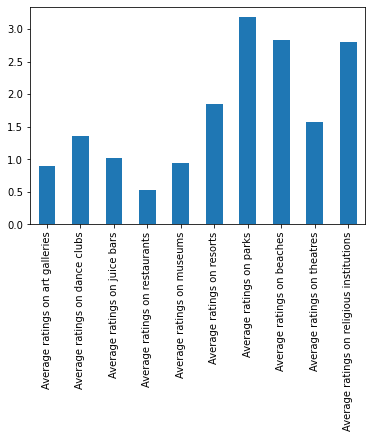

In [5]:
# Rank the categories by highest average:
TAAvg = TAData.mean(axis=0)
print(TAAvg.sort_values(ascending = False))
TAAvg.plot.bar()

From this chart we can see that parks and beachs have the highest average rating, along with religious institutions. 

Next lets look at the Europe data (Google)

In [6]:
# Rank the categories by highest average:
avg = googleData.mean(axis = 0)
print(avg.sort_values(ascending = False))

Average ratings on malls                    3.351395
Average ratings on restaurants              3.126019
Average ratings on theatres                 2.958941
Average ratings on museums                  2.893490
Average ratings on pubs/bars                2.832729
Average ratings on parks                    2.796886
Average ratings on zoo                      2.540795
Average ratings on beaches                  2.489331
Average ratings on resorts                  2.319707
Average ratings on art galleries            2.206573
Average ratings on juice bars               2.190861
Average ratings on hotels/other lodgings    2.125511
Average ratings on burger/pizza shops       2.078339
Average ratings on view points              1.750537
Average ratings on gardens                  1.560755
Average ratings on monuments                1.531453
Average ratings on churches                 1.455720
Average ratings on dance clubs              1.192801
Average ratings on beauty & spas            1.

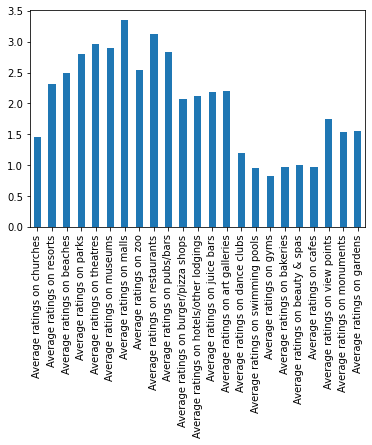

In [7]:
avg.plot.bar() # We see there been a steady distribution across all rating lavels 

From the chart above we see that there are many types of attractions that all have high and similar ratings to one another. Particularly we can see that malls and resturants are two of the highest. 

In [8]:
# Figure out the ratio of reviews above 1 (2 is a rating of average).
mostLike = []
for col in TAColumns[1:]:
    mask = (TAData[col] >= 1)
    try:
        ratio = (mask.value_counts()[True] / (mask.value_counts()[False]+mask.value_counts()[True]))*100
        print(str(ratio) + '% users considered near average or above for', col)
        if ratio > 50:
            mostLike.append(col)
    except:
        print('100% users considered near average or above for', col)
        mostLike.append(col)
print('--------------------------------------')
print('Attractions that most people think are near average or above:') 
TAData[mostLike].head()

27.142857142857142% users considered near average or above for Average ratings on art galleries
82.75510204081633% users considered near average or above for Average ratings on dance clubs
44.89795918367347% users considered near average or above for Average ratings on juice bars
3.1632653061224487% users considered near average or above for Average ratings on restaurants
40.61224489795918% users considered near average or above for Average ratings on museums
95.3061224489796% users considered near average or above for Average ratings on resorts
100% users considered near average or above for Average ratings on parks
100% users considered near average or above for Average ratings on beaches
97.85714285714285% users considered near average or above for Average ratings on theatres
100% users considered near average or above for Average ratings on religious institutions
--------------------------------------
Attractions that most people think are near average or above:


,Average ratings on dance clubs,Average ratings on resorts,Average ratings on parks,Average ratings on beaches,Average ratings on theatres,Average ratings on religious institutions
Unique user id,,,,,,
User 1,1.8,2.42,3.19,2.79,1.82,2.42
User 2,2.2,3.18,3.21,2.63,1.86,2.32
User 3,0.8,1.54,3.18,2.80,1.31,2.50
User 4,1.8,1.52,3.18,2.96,1.57,2.86
User 5,1.2,2.02,3.18,2.78,1.18,2.54


This table shows the ratios of ratings above 1 per category. A rating of 2 is considered average for a rating on trip advisor, thus we can which categories users thought were near or above average. We see that tourists in Asia seem to like resorts, parks, beaches, and religious sites across the board. For the other categories, most users seemed to deem them not up to average  

We tried the same with the Google data but chose 2 as the baseline number since a 3 is considered average in Google reviews, below the resulting table.

In [9]:
mostLike = []
for col in googleData[1:]:
    #print(col)
    mask = (googleData[col] >= 2)
    try:
        ratio = (mask.value_counts()[True] / (mask.value_counts()[False]+mask.value_counts()[True]))*100
        print(str(ratio) + '% users considered near average or above for', col)
        if ratio > 50:
            mostLike.append(col)
    except:
        print('100% users considered near average or above for', col)
print('--------------------------------------')
print('Attractions that most people think are near average or above:') 
googleData[mostLike].head()

20.65615835777126% users considered near average or above for Average ratings on churches
48.68035190615836% users considered near average or above for Average ratings on resorts
53.83064516129033% users considered near average or above for Average ratings on beaches
62.86656891495601% users considered near average or above for Average ratings on parks
64.35117302052787% users considered near average or above for Average ratings on theatres
64.80938416422288% users considered near average or above for Average ratings on museums
73.07551319648094% users considered near average or above for Average ratings on malls
55.40689149560117% users considered near average or above for Average ratings on zoo
71.18768328445748% users considered near average or above for Average ratings on restaurants
66.33064516129032% users considered near average or above for Average ratings on pubs/bars
33.98093841642228% users considered near average or above for Average ratings on burger/pizza shops
29.5271260

,Average ratings on beaches,Average ratings on parks,Average ratings on theatres,Average ratings on museums,Average ratings on malls,Average ratings on zoo,Average ratings on restaurants,Average ratings on pubs/bars
Unique user id,,,,,,,,
User 1,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64
User 2,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65
User 3,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64
User 4,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64
User 5,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64


This table shows the ratios of ratings above 1 per category. A rating of 2 is considered average for a rating on trip advisor, thus we can which categories users thought were near or above average. From a glance, we see that parks, beaches, and theaters are popular. However, we can also see some attractions popular in Asia are not as popular in Europe, ex. dance clubs. 


To reach a more direct analysis between the two datasets, we decided to seperate the categories common to both

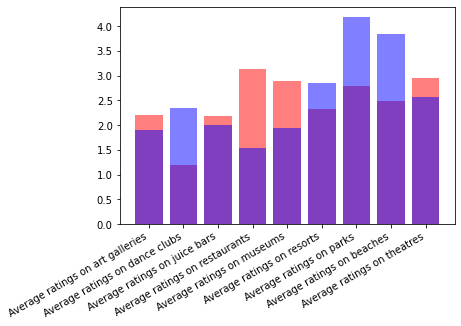

In [10]:
commonCategories =[
    'Average ratings on art galleries',
    'Average ratings on dance clubs',
    'Average ratings on juice bars',
    'Average ratings on restaurants',
    'Average ratings on museums',
    'Average ratings on resorts',
    'Average ratings on parks',
    'Average ratings on beaches',
    'Average ratings on theatres'
]
taCopy = TAData.copy()
taCopy[commonCategories] += 1 # add one to all TA data to make the scales of google and TA match 
a = googleData[commonCategories].mean()
b = taCopy[commonCategories].mean()

plt.figure(1)
plt.clf()
plt.bar(commonCategories,a, color = 'r', label='Google Data', alpha=.5)
plt.bar(commonCategories,b, color = 'b', label='Trip Advisor Data', alpha=.5)
plt.xticks(rotation= 30,ha="right")
plt.legend=True
plt.stack = False
plt.show()

The graph above compares the average ratings between the EU and Asia data in the common categories. We see that things like resturants and juice bars are higher rated in Europe while parks and beaches are rated higher in Asia. There seems to be more of an affinity for the outdoors in Asia 

## Part 4: Investigating Relationships

While these initial comparisons are interesting we wanted to check if there is any correlation between certain categories with in the data sets

In [11]:
import json
import math
googleCor = {}
for i in googleData:
    googleCor[i] = []
    for j in googleData:
        if i == j:
            continue
        if abs(googleData[i].corr(googleData[j])) > 0.5:
            googleCor[i].append((j,round(googleData[i].corr(googleData[j]), 4)))
googleCor = {key:val for key, val in googleCor.items() if val != []} 
pd.DataFrame(googleCor.values(), index=googleCor.keys())

,0,1
Average ratings on parks,"(Average ratings on theatres, 0.6269)",None
Average ratings on theatres,"(Average ratings on parks, 0.6269)",None
Average ratings on zoo,"(Average ratings on restaurants, 0.5369)","(Average ratings on pubs/bars, 0.5514)"
Average ratings on restaurants,"(Average ratings on zoo, 0.5369)","(Average ratings on pubs/bars, 0.5641)"
Average ratings on pubs/bars,"(Average ratings on zoo, 0.5514)","(Average ratings on restaurants, 0.5641)"
Average ratings on hotels/other lodgings,"(Average ratings on juice bars, 0.5123)",None
Average ratings on juice bars,"(Average ratings on hotels/other lodgings, 0.5...",None
Average ratings on swimming pools,"(Average ratings on gyms, 0.5138)",None
Average ratings on gyms,"(Average ratings on swimming pools, 0.5138)",None


In [12]:
TACor = {}
for i in TAData:
    TACor[i] = []
    for j in TAData:
        if i == j:
            continue
        if abs(TAData[i].corr(TAData[j])) > 0.4:
            TACor[i].append((j,round(TAData[i].corr(TAData[j]), 4)))
TACor = {key:val for key, val in TACor.items() if val != []} 
pd.DataFrame(TACor.values(), index=TACor.keys())

,0,1,2
Average ratings on juice bars,"(Average ratings on parks, 0.7507)","(Average ratings on religious institutions, -0...",None
Average ratings on museums,"(Average ratings on resorts, 0.5813)",None,None
Average ratings on resorts,"(Average ratings on museums, 0.5813)","(Average ratings on parks, 0.4307)","(Average ratings on religious institutions, -0..."
Average ratings on parks,"(Average ratings on juice bars, 0.7507)","(Average ratings on resorts, 0.4307)","(Average ratings on religious institutions, -0..."
Average ratings on religious institutions,"(Average ratings on juice bars, -0.4405)","(Average ratings on resorts, -0.4381)","(Average ratings on parks, -0.7107)"


## Part 5: Finding Clusters in our Data

### Google Data

In [206]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

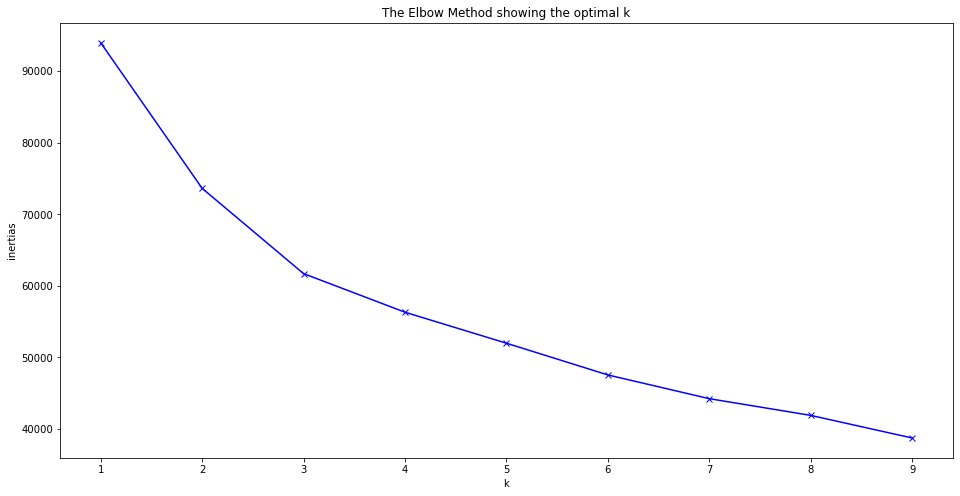

In [207]:
new = googleData[commonCategories]
inertias = []
for i in range(1,10):
    model = KMeans(n_clusters=i)
    model.fit(new)
    inertias.append(model.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,10), inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertias')
plt.title('The Elbow Method showing the optimal k')
plt.show()

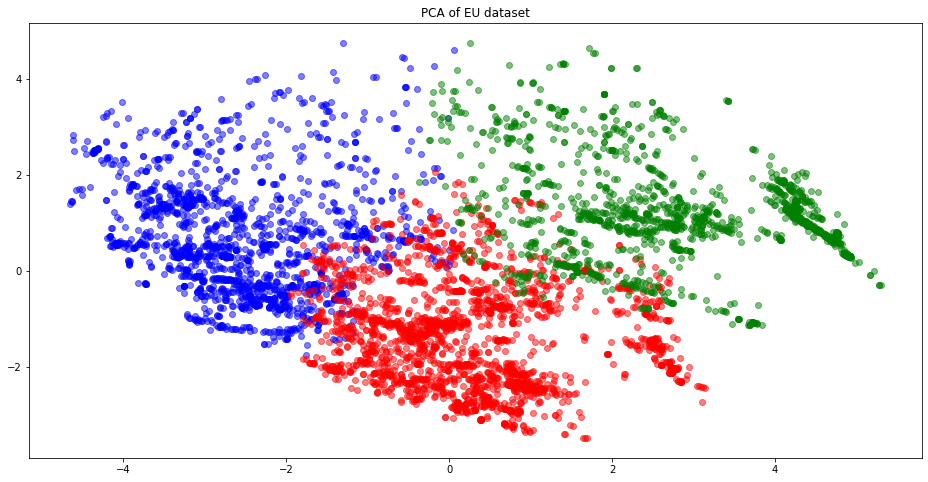

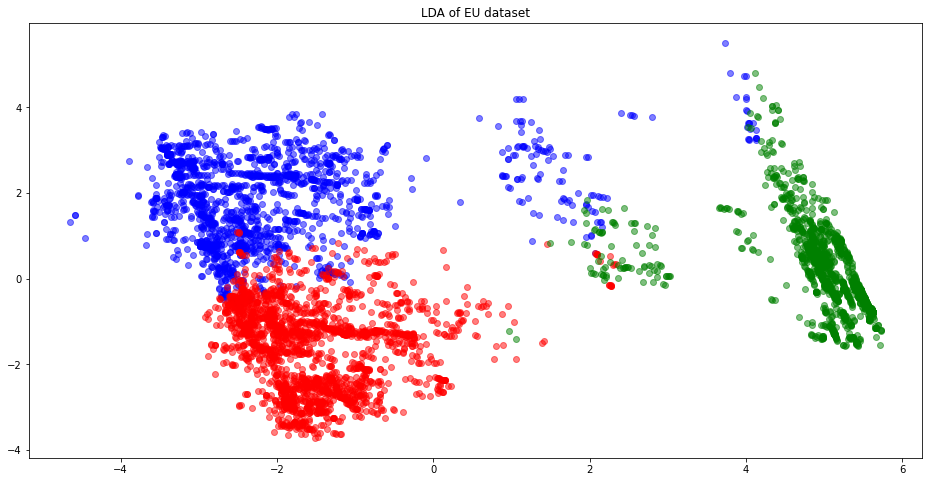

In [243]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(new)
clusterNames = kmeans.labels_


X = new
y = clusterNames
target_names = [0,1,2]

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# # Percentage of variance explained for each components
# print('explained variance ratio (first two components): %s'
#       % str(pca.explained_variance_ratio_))

plt.figure(figsize=(16,8))

colors = ['blue', 'red', 'green','orange']

for color, i, target_name in zip(colors, range(0,4), target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.5,
                label=target_name)

plt.title('PCA of EU dataset')
plt.figure(figsize=(16,8))


for color, i, target_name in zip(colors, range(0,4), target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.5, color=color,
                label=target_name)
#plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of EU dataset')

plt.show()

In [244]:
people = list(clusterNames)

zero = []
one = []
two = []

for i in range(len(people)):
    if people[i] == 0:
        zero.append(i)
    elif people[i] == 1:
        one.append(i)
    else:
        two.append(i)

In [245]:
new.iloc[zero].mean() # Blue cluster

Average ratings on art galleries    1.322139
Average ratings on dance clubs      1.133712
Average ratings on juice bars       1.484658
Average ratings on restaurants      2.486321
Average ratings on museums          3.581657
Average ratings on resorts          2.760196
Average ratings on parks            4.152744
Average ratings on beaches          3.378281
Average ratings on theatres         4.396568
dtype: float64

In [246]:
new.iloc[one].mean() # Red cluster

Average ratings on art galleries    1.164557
Average ratings on dance clubs      1.143420
Average ratings on juice bars       2.076404
Average ratings on restaurants      3.441645
Average ratings on museums          2.612728
Average ratings on resorts          2.123780
Average ratings on parks            2.154220
Average ratings on beaches          2.005654
Average ratings on theatres         2.321312
dtype: float64

In [247]:
new.iloc[two].mean() # green cluster

Average ratings on art galleries    4.904208
Average ratings on dance clubs      1.341869
Average ratings on juice bars       3.239958
Average ratings on restaurants      3.430678
Average ratings on museums          2.475239
Average ratings on resorts          2.076955
Average ratings on parks            2.110637
Average ratings on beaches          2.135363
Average ratings on theatres         2.163869
dtype: float64

### TripAdvisor Data

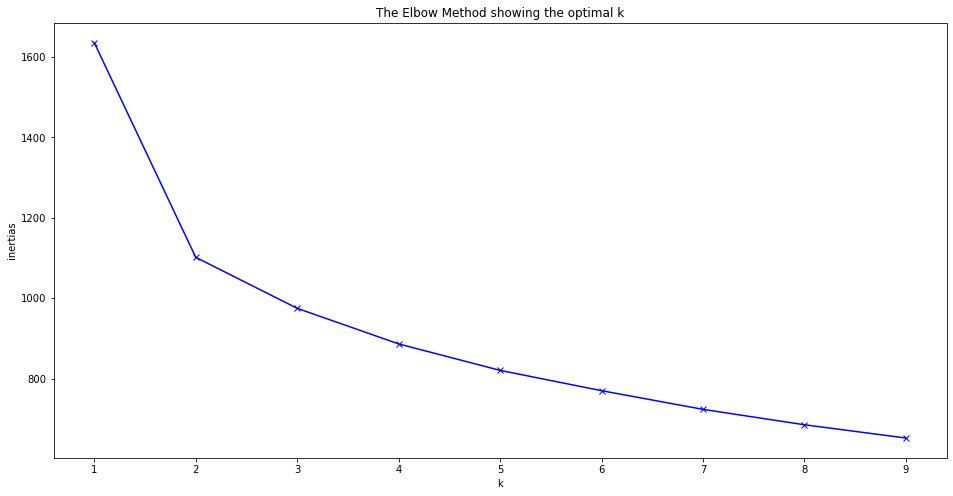

In [115]:
TANew = TAData[commonCategories] + 1 # to give the data the same scale as the google data 
inertias = []
for i in range(1,10):
    model = KMeans(n_clusters=i)
    model.fit(TANew)
    inertias.append(model.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,10), inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertias')
plt.title('The Elbow Method showing the optimal k')
plt.show()

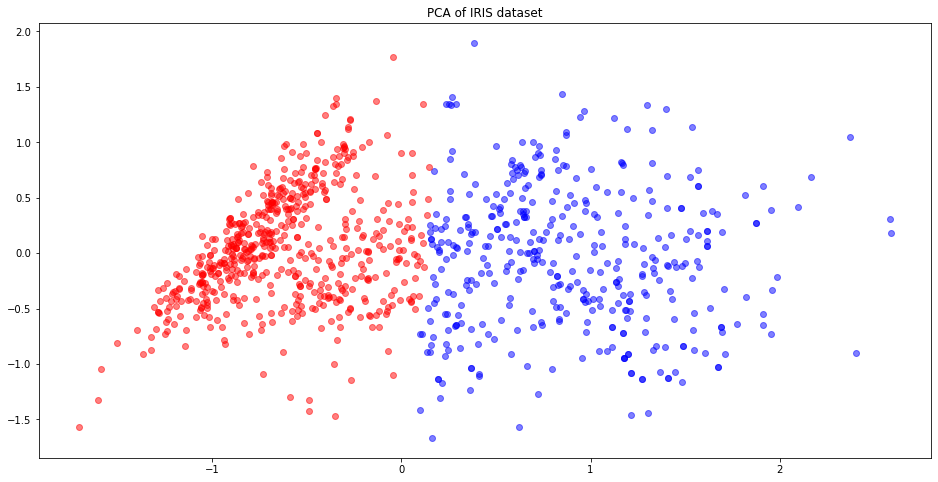

In [197]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(TANew)
clusterNames = kmeans.labels_

X = TANew
y = clusterNames
target_names = [0,1]

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
# X_r2 = lda.fit(X, y).transform(X)

# # Percentage of variance explained for each components
# print('explained variance ratio (first two components): %s'
#       % str(pca.explained_variance_ratio_))

plt.figure(figsize=(16,8))
colors = ['blue', 'red', 'green','orange']

for color, i, target_name in zip(colors, range(0,4), target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.5,
                label=target_name)
#plt.legend(loc='best', scatterpoints=1)
plt.title('PCA of IRIS dataset')

# for color, i, target_name in zip(colors, range(0,4), target_names):
#     plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.5, color=color,
#                 label=target_name)
# plt.legend(loc='best', shadow=False, scatterpoints=1)
# plt.title('LDA of IRIS dataset')

plt.show()

In [198]:
people = list(clusterNames)

zero = []
one = []

for i in range(len(people)):
    if people[i] == 0:
        zero.append(i)
    elif people[i] == 1:
        one.append(i)

In [199]:
TANew.iloc[zero].mean() #blue

Average ratings on art galleries    1.901940
Average ratings on dance clubs      2.413333
Average ratings on juice bars       2.805124
Average ratings on restaurants      1.574751
Average ratings on museums          2.161592
Average ratings on resorts          3.156517
Average ratings on parks            4.186816
Average ratings on beaches          3.808184
Average ratings on theatres         2.524229
dtype: float64

In [200]:
TANew.iloc[one].mean()

Average ratings on art galleries    1.887111
Average ratings on dance clubs      2.310381
Average ratings on juice bars       1.462595
Average ratings on restaurants      1.503114
Average ratings on museums          1.785433
Average ratings on resorts          2.624775
Average ratings on parks            4.176851
Average ratings on beaches          3.853754
Average ratings on theatres         2.600882
dtype: float64

## Part 6: Predicting Ratings

Based on the clusters we found, we wondered if we could predict the a user's rating for a attraction based on their other ratings. To answer this question we decided to use the K-Closest neighbors algorithm 

In [248]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

kNData = googleData[commonCategories]

features = [ 
    'Average ratings on art galleries',
    'Average ratings on dance clubs',
    'Average ratings on juice bars',
    'Average ratings on museums',
    'Average ratings on resorts',
    'Average ratings on parks',
    'Average ratings on beaches',
    'Average ratings on theatres'
]

xTrainDict = kNData[features].to_dict(orient='records') # defining training data
xNewDict = [{
    'Average ratings on art galleries' : 4.9,
    'Average ratings on dance clubs': 1.34,
    'Average ratings on juice bars': 3.24,
    'Average ratings on museums': 2.5,
    'Average ratings on resorts': 2.1,
    'Average ratings on parks': 2.11,
    'Average ratings on beaches': 2.14,
    'Average ratings on theatres' : 2.16
}]
yTrain = kNData['Average ratings on restaurants'] # what we want to find out 

vec = DictVectorizer(sparse=False)
vec.fit(xTrainDict)
X_train = vec.transform(xTrainDict)
X_new = vec.transform(xNewDict)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_new_sc = scaler.transform(X_new)

(1499, -1.1206004657487783)


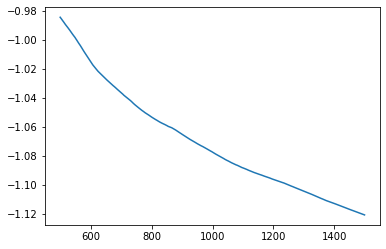

In [165]:
average = 0
# for i in range (1000,2000):
#     model = KNeighborsRegressor(n_neighbors=i)
#     model.fit(X_train_sc, yTrain)
#     print(model.predict(X_new_sc))
#     average += mode.predict(X_new_sc)
# print()

MAE = {}
low = (0,0)
for i in range(500,2100):
    model = KNeighborsRegressor(n_neighbors=i)
    pipeline = Pipeline([("vectorizer", vec), ("scaler", scaler), ("fit", model)])
    scores = cross_val_score(pipeline, xTrainDict, yTrain, cv=5, scoring="neg_mean_absolute_error") # run pipeline with 5 folds 
    MAE[i]=scores.mean() # find mean to plot easily 
    if scores.mean() < low[1]: #store value if lower 
        low = (i,scores.mean()) 
print(low)
plt.plot(*zip(*sorted(MAE.items()))) # plot all items 
plt.show()

In [249]:
model = KNeighborsRegressor(n_neighbors=1400)
model.fit(X_train_sc, yTrain)
print(model.predict(X_new_sc))

[3.20962857]


### TripAdvisor Data

In [203]:
TAKData = TAData[commonCategories] +1
features = [ 
    'Average ratings on art galleries',
    'Average ratings on dance clubs',
    'Average ratings on juice bars',
    'Average ratings on museums',
    'Average ratings on resorts',
    'Average ratings on parks',
    'Average ratings on beaches',
    'Average ratings on theatres'
]

xTrainDict = TAKData[features].to_dict(orient='records') # defining training data
xNewDict = [{
    'Average ratings on art galleries' : 1.9,
    'Average ratings on dance clubs': 2.3,
    'Average ratings on juice bars': 1.5,
    'Average ratings on museums': 1.8,
    'Average ratings on resorts': 2.6,
    'Average ratings on parks': 4.2,
    'Average ratings on beaches': 3.9,
    'Average ratings on theatres' : 2.6
}]

yTrain = TAKData['Average ratings on restaurants'] # what we want to find out 
vec = DictVectorizer(sparse=False)
vec.fit(xTrainDict)
X_train = vec.transform(xTrainDict)
X_new = vec.transform(xNewDict)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_new_sc = scaler.transform(X_new)

(1, -0.13894897959183675)


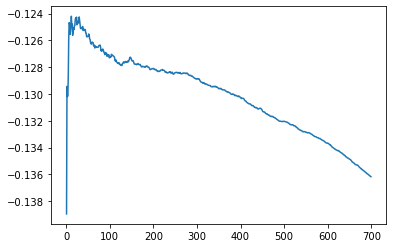

In [170]:
MAE = {}
low = (0,0)
for i in range(1,700):
    model = KNeighborsRegressor(n_neighbors=i)
    pipeline = Pipeline([("vectorizer", vec), ("scaler", scaler), ("fit", model)])
    scores = cross_val_score(pipeline, xTrainDict, yTrain, cv=5, scoring="neg_mean_absolute_error") # run pipeline with 5 folds 
    MAE[i]=scores.mean() # find mean to plot easily 
    if scores.mean() < low[1]: #store value if lower 
        low = (i,scores.mean()) 
print(low)
plt.plot(*zip(*sorted(MAE.items()))) # plot all items 
plt.show()

In [204]:
model = KNeighborsRegressor(n_neighbors=750)
model.fit(X_train_sc, yTrain)
print(model.predict(X_new_sc))

[1.53070667]


## Part 7: Applications of our work